In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import BaggingClassifier

In [26]:
N = 1000
Xg = np.random.randn(N,2) + np.array([-1,-1])
Xm = np.random.randn(N,2) + np.array([1,1])
Xa = np.vstack([Xg,Xm])
L = np.array([ 'green' ]*N + [ 'magenta' ]*N)
print(Xa.shape)
print(L.shape)

df = pd.DataFrame({'x0':Xa[:,0], 'x1':Xa[:,1], 'color':L })
df.head()


df_train, df_test = train_test_split(df)

(2000, 2)
(2000,)


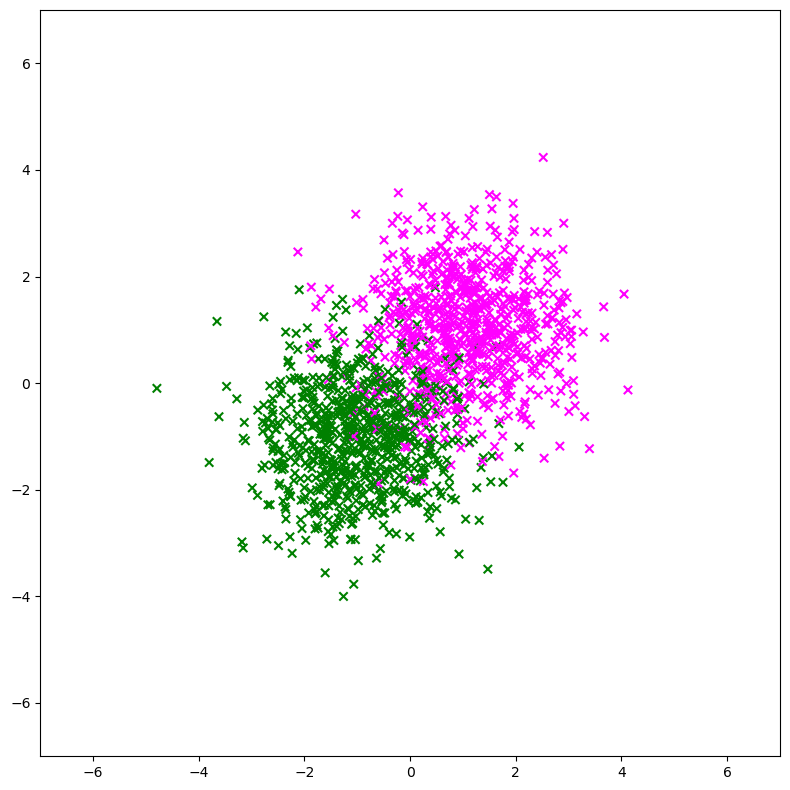

In [27]:
fig,ax = plt.subplots(1, figsize=(8,8), dpi=100)
ax.scatter(df_train['x0'], df_train['x1'], color=df_train['color'], marker='x')

ax.set_xlim(-7,7)
ax.set_ylim(-7,7)
plt.tight_layout()
plt.show()

In [28]:
t = DecisionTreeClassifier(max_depth=5)
m = BaggingClassifier(t, n_estimators=10)

In [29]:
m.fit(df_train[['x0','x1']], df_train['color'])

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5))

In [30]:
for b in range(m.n_estimators):
    print(f"\nbag model {b}")
    print(f"    uses samples: {m.estimators_samples_[b]}")
    print(f"    has model {m.estimators_[b]}")


bag model 0
    uses samples: [  38  378  749 ...   58 1473  226]
    has model DecisionTreeClassifier(max_depth=5, random_state=2073538598)

bag model 1
    uses samples: [1118 1177   42 ...  491  421 1169]
    has model DecisionTreeClassifier(max_depth=5, random_state=649813086)

bag model 2
    uses samples: [ 747   59  126 ... 1356  995  435]
    has model DecisionTreeClassifier(max_depth=5, random_state=980044523)

bag model 3
    uses samples: [168 530  49 ... 240  53 214]
    has model DecisionTreeClassifier(max_depth=5, random_state=1709221573)

bag model 4
    uses samples: [ 757  698  926 ...   72 1167 1296]
    has model DecisionTreeClassifier(max_depth=5, random_state=1623231221)

bag model 5
    uses samples: [1172    6  896 ... 1490 1263  372]
    has model DecisionTreeClassifier(max_depth=5, random_state=1433357460)

bag model 6
    uses samples: [  91 1222 1273 ... 1413  308 1335]
    has model DecisionTreeClassifier(max_depth=5, random_state=230078555)

bag model 7
  

In [31]:
x_min, x_max = -5, 5 
y_min, y_max = -5, 5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

dfgrid = pd.DataFrame({'x0':xx.flatten(), 'x1':yy.flatten()})

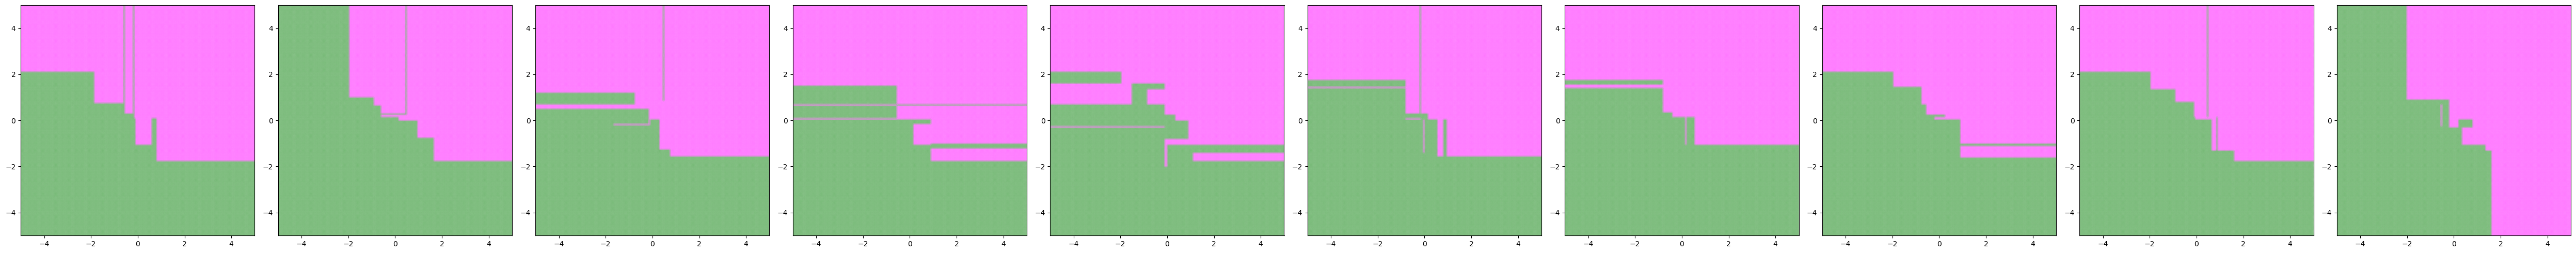

In [32]:
fig,ax = plt.subplots(1,m.n_estimators, figsize=(5*m.n_estimators,5), dpi=100)
for b in range(m.n_estimators):
    fb = m.estimators_[b]
    # THE NEXT LINE IS WHAT I MESSED UP IN CLASS!
    # The subclasses recast the labels 'green'/'magenta' as 0/1,
    # But the conversion back is provided by the list m.classes_
    output = m.classes_[fb.predict(dfgrid[['x0','x1']].values)]
    ax[b].scatter(dfgrid['x0'], dfgrid['x1'], color=output, marker='.', alpha=0.1)
    ax[b].set_xlim(-5,5)
    ax[b].set_ylim(-5,5)
plt.tight_layout()
plt.show()

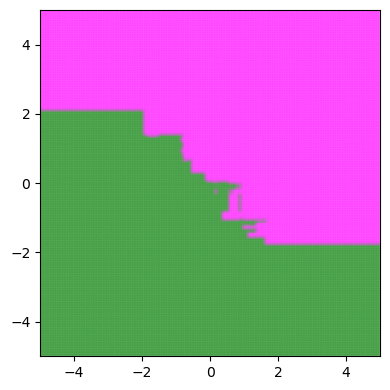

In [33]:
output = m.predict(dfgrid[['x0','x1']])

fig,ax = plt.subplots(1, figsize=(4,4), dpi=100)
ax.scatter(dfgrid['x0'], dfgrid['x1'], color=output, marker='.', alpha=0.1)
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
plt.tight_layout()
plt.show()

In [34]:
from sklearn.preprocessing import LabelEncoder


print(df_train['color'].values)

le = LabelEncoder()
le.fit(df_train['color'])
le.transform(df_train['color'])

le.inverse_transform([0,1,0,1])

['green' 'magenta' 'magenta' ... 'green' 'green' 'magenta']


array(['green', 'magenta', 'green', 'magenta'], dtype=object)

In [35]:
df_train['category'] = le.transform(df_train['color'])
df_test['category'] = le.transform(df_test['color'])

In [36]:
for b in range(m.n_estimators):
    fb = m.estimators_[b]
    train_score = fb.score(df_train[['x0','x1']].values, df_train['category'].values)
    test_score = fb.score(df_test[['x0','x1']].values, df_test['category'].values)
    print(f"model {b} has train scores\n{train_score}\n{test_score}")

model 0 has train scores
0.918
0.886
model 1 has train scores
0.926
0.88
model 2 has train scores
0.9213333333333333
0.89
model 3 has train scores
0.9253333333333333
0.884
model 4 has train scores
0.9246666666666666
0.882
model 5 has train scores
0.9313333333333333
0.888
model 6 has train scores
0.93
0.896
model 7 has train scores
0.9286666666666666
0.904
model 8 has train scores
0.9273333333333333
0.9
model 9 has train scores
0.9293333333333333
0.888


In [37]:
train_score = m.score(df_train[['x0','x1']], df_train['color'])
test_score = m.score(df_test[['x0','x1']], df_test['color'])
print(f"bagging model has train scores\n{train_score}\n{test_score}")

bagging model has train scores
0.9333333333333333
0.9


In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/bezdekIris.data', names=['sepal length', 'sepal width', 'petal length', 'petal width', 'species'])
X = df.drop(columns=['species'])
Y = df['species']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [40]:
m = RandomForestClassifier()
m.fit(X_train, Y_train)
m.score(X_test, Y_test)

0.9736842105263158

array([[<AxesSubplot:xlabel='sepal length', ylabel='sepal length'>,
        <AxesSubplot:xlabel='sepal width', ylabel='sepal length'>,
        <AxesSubplot:xlabel='petal length', ylabel='sepal length'>,
        <AxesSubplot:xlabel='petal width', ylabel='sepal length'>],
       [<AxesSubplot:xlabel='sepal length', ylabel='sepal width'>,
        <AxesSubplot:xlabel='sepal width', ylabel='sepal width'>,
        <AxesSubplot:xlabel='petal length', ylabel='sepal width'>,
        <AxesSubplot:xlabel='petal width', ylabel='sepal width'>],
       [<AxesSubplot:xlabel='sepal length', ylabel='petal length'>,
        <AxesSubplot:xlabel='sepal width', ylabel='petal length'>,
        <AxesSubplot:xlabel='petal length', ylabel='petal length'>,
        <AxesSubplot:xlabel='petal width', ylabel='petal length'>],
       [<AxesSubplot:xlabel='sepal length', ylabel='petal width'>,
        <AxesSubplot:xlabel='sepal width', ylabel='petal width'>,
        <AxesSubplot:xlabel='petal length', ylabel='petal 

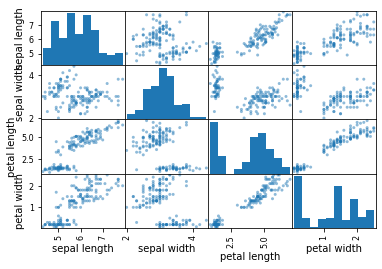

In [41]:
pd.plotting.scatter_matrix(df)